<a href="https://colab.research.google.com/github/Krandheer/Krandheer/blob/main/BengaluruEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [ ]:
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.000,1.000,39.070
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.000,3.000,120.000
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.000,3.000,62.000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.000,1.000,95.000
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.000,1.000,51.000


In [ ]:
print(df.shape)
print(df.dtypes)

(13320, 9)
area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object


In [ ]:
print(f'number of rows and columns {df.shape}')
for col in df.columns:
  if df[col].isnull().values.any():
    print(f'column: {col}, number of null values: {df[col].isnull().sum()}')

number of rows and columns (13320, 9)
column: location, number of null values: 1
column: size, number of null values: 16
column: society, number of null values: 5502
column: bath, number of null values: 73
column: balcony, number of null values: 609


We have total 9 features out of which 3 are float type and 6 are of object types. among these features 5 contains null values. since location contains only 1 null values, so it can be ignored, hence left with 4 columns containing null values. among null values column society and balcony contains the most null values.

In [ ]:
missing_ration = (df.isnull().sum()/ df.shape[0]) * 100
missing_ration

area_type       0.000
availability    0.000
location        0.008
size            0.120
society        41.306
total_sqft      0.000
bath            0.548
balcony         4.572
price           0.000
dtype: float64

The null value to total value ratio of society column is very high. almost 42%. society column may be ignored in further analysis and removed from dataset as half of the data is null in that column. Rest columns null value is very less, so we may like to drop those rows containning null values.

In [ ]:
df.drop('society', axis=1, inplace=True)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.000,1.000,39.070
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.000,3.000,120.000
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.000,3.000,62.000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.000,1.000,95.000
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.000,1.000,51.000


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)
df.shape

(12710, 8)

In [ ]:
df['bath']=df['bath'].astype('int')
df['balcony']=df['balcony'].astype('int')

In [ ]:
distincts = df.apply(lambda x: x.unique().shape[0])
distincts

area_type          4
availability      78
location        1265
size              27
total_sqft      1976
bath              16
balcony            4
price           1924
dtype: int64

In [ ]:
df['size']=df['size'].str.split().str[0]
df['size']=df['size'].astype('int')
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2,1,39.070
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5,3,120.000
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2,3,62.000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3,1,95.000
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2,1,51.000


we should convert size and total_sqft in numerical data types.

In [ ]:
def convert(x):
  x=str(x)
  temp=x.split('-')
  if len(temp)==2:
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df.total_sqft=df.total_sqft.apply(convert)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)
df['total_sqft']=df['total_sqft'].astype('int')
df.shape

(12668, 8)

In [ ]:
df.dtypes

area_type        object
availability     object
location         object
size              int64
total_sqft        int64
bath              int64
balcony           int64
price           float64
dtype: object

In [ ]:
df.corr()

,size,total_sqft,bath,balcony,price
size,1.000,0.349,0.887,0.187,0.407
total_sqft,0.349,1.000,0.394,0.149,0.559
bath,0.887,0.394,1.000,0.204,0.459
balcony,0.187,0.149,0.204,1.000,0.120
price,0.407,0.559,0.459,0.120,1.000


In [ ]:
def change_to_numeric(x):
    if x == 'Super built-up  Area':
        return 0
    elif x == 'Plot  Area':
        return 1
    elif x == 'Built-up  Area':
        return 2
    else:
        return 3

df['area_type_numeric'] = df['area_type'].apply(change_to_numeric)

In [ ]:
df2 = df[['area_type_numeric', 'price']]
df2.corr()

,area_type_numeric,price
area_type_numeric,1.000,0.096
price,0.096,1.000


we can see that area_type has very less to do with price hence we may drop that column itself.

In [ ]:
df_temp = df[['balcony', 'price']]
df_temp.corr()


,balcony,price
balcony,1.000,0.120
price,0.120,1.000


we see that balcony with area_type has very less to do with price hence balcony column may be dropped


In [ ]:
def ready(x):
    if x == 'Ready To Move':
        return 1
    else:
        return 0
df['availability'] = df['availability'].apply(ready)

In [ ]:
df_temp = df[['availability', 'price']]
df_temp.corr()

,availability,price
availability,1.000,0.031
price,0.031,1.000


we can see that availibility with balcony and area_type has very less to do with price hence availibility column can be dropped.

In [ ]:
df_1 = df.copy()
df_1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,area_type_numeric
0,Super built-up Area,0,Electronic City Phase II,2,1056,2,1,39.070,0
1,Plot Area,1,Chikka Tirupathi,4,2600,5,3,120.000,1
2,Built-up Area,1,Uttarahalli,3,1440,2,3,62.000,2
3,Super built-up Area,1,Lingadheeranahalli,3,1521,3,1,95.000,0
4,Super built-up Area,1,Kothanur,2,1200,2,1,51.000,0


In [ ]:
df_1.drop(['balcony', 'area_type', 'availability'], axis = 1, inplace=True)
df_1.head()

,location,size,total_sqft,bath,price,area_type_numeric
0,Electronic City Phase II,2,1056,2,39.070,0
1,Chikka Tirupathi,4,2600,5,120.000,1
2,Uttarahalli,3,1440,2,62.000,2
3,Lingadheeranahalli,3,1521,3,95.000,0
4,Kothanur,2,1200,2,51.000,0


In [ ]:
df_1.dtypes

location              object
size                   int64
total_sqft             int64
bath                   int64
price                float64
area_type_numeric      int64
dtype: object

In [ ]:
location_stat=df_1['location'].value_counts()
location_stat

Whitefield                              513
Sarjapur  Road                          372
Electronic City                         300
Kanakpura Road                          259
Thanisandra                             230
                                       ... 
kadubisnahalli                            1
Kengeri Satellite Town KHB Apartment      1
1A Block Koramangala                      1
Rajagopala Nagar                          1
Karnataka Shabarimala                     1
Name: location, Length: 1259, dtype: int64

In [ ]:
#store location which is less than 10 times atleast 
location_stat5=location_stat[location_stat< 10]
location_stat5

Gollahalli                              9
Nagadevanahalli                         9
Chennammana Kere                        9
Chandra Layout                          9
Kaverappa Layout                        9
                                       ..
kadubisnahalli                          1
Kengeri Satellite Town KHB Apartment    1
1A Block Koramangala                    1
Rajagopala Nagar                        1
Karnataka Shabarimala                   1
Name: location, Length: 1012, dtype: int64

In [ ]:
#replacing location which appear less than 5 times in data with value as "others"
df_1['location'] = df_1['location'].apply(lambda x : 'Others' if x in location_stat5 else x)

In [ ]:
df_1['location'].value_counts()

Others                  2636
Whitefield               513
Sarjapur  Road           372
Electronic City          300
Kanakpura Road           259
                        ... 
Nagappa Reddy Layout      10
Kalkere                   10
Doddaballapur             10
HAL 2nd Stage             10
Naganathapura             10
Name: location, Length: 248, dtype: int64

Text(0, 0.5, 'Count')

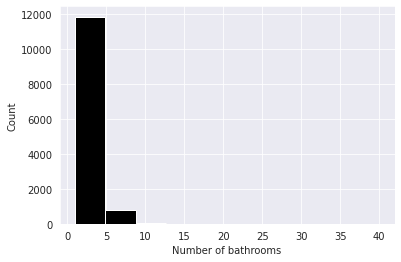

In [ ]:
plt.hist(df_1.bath, color = "black")
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df_1.bath.value_counts()

2     6820
3     3134
4     1105
1      779
5      428
6      240
7       82
8       42
9       26
10       6
15       1
13       1
12       1
27       1
11       1
40       1
Name: bath, dtype: int64

we can remove all data in which number of bathroom is greater than 10.

In [ ]:
df_1 = df_1[df_1.bath<10]
df_1.bath.value_counts()

2    6820
3    3134
4    1105
1     779
5     428
6     240
7      82
8      42
9      26
Name: bath, dtype: int64

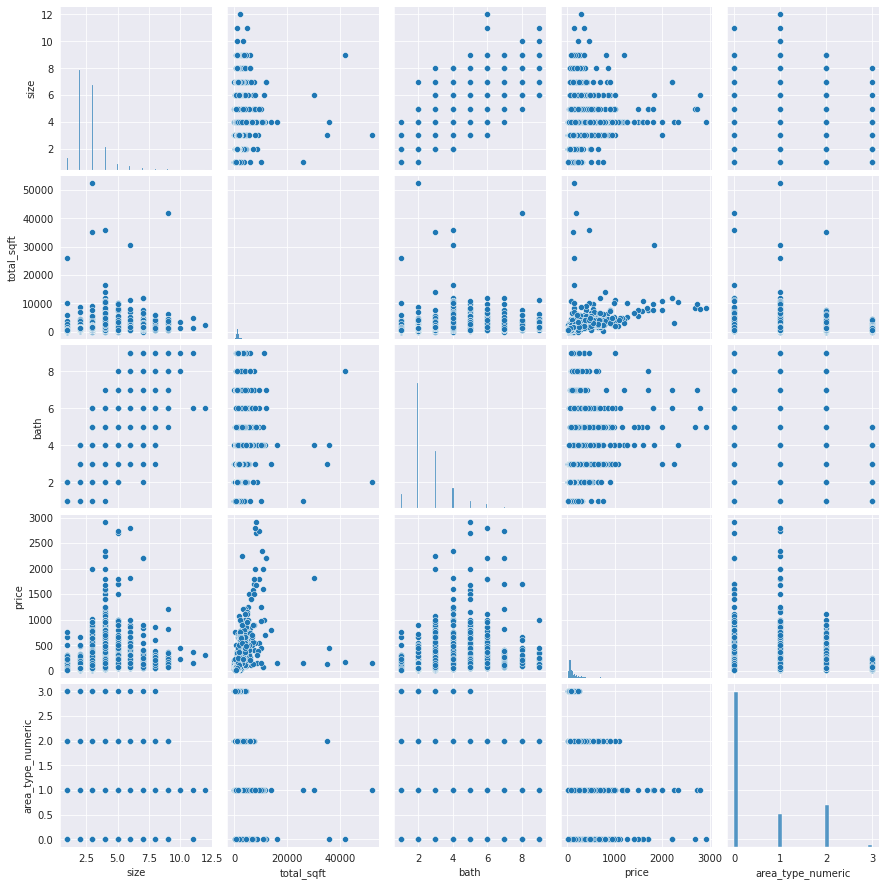

In [ ]:
df_2 = df_1.copy()
sns.pairplot(df_2)
plt.show()

from above plot we can see that if we treat price as target then total_sqft greater than 20000 is outliers, so we may remove them.

In [ ]:
df_1=df_1[df['total_sqft']<30000]
df_1.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,size,total_sqft,bath,price,area_type_numeric
size,1.000,0.448,0.869,0.425,0.185
total_sqft,0.448,1.000,0.523,0.702,0.070
bath,0.869,0.523,1.000,0.484,0.155
price,0.425,0.702,0.484,1.000,0.096
area_type_numeric,0.185,0.070,0.155,0.096,1.000


from above correlation study we can see that in correlation with price, area_type_numeric column can be delete

In [ ]:
df_1.drop('area_type_numeric', axis=1, inplace=True)
df_1.shape

(12651, 5)

In [ ]:
df_1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2,39.070
1,Chikka Tirupathi,4,2600,5,120.000
2,Uttarahalli,3,1440,2,62.000
3,Lingadheeranahalli,3,1521,3,95.000
4,Kothanur,2,1200,2,51.000


In [ ]:
df_1['size'].value_counts()

2     5471
3     4639
4     1234
1      639
5      295
6      190
7       85
8       63
9       30
11       2
10       2
12       1
Name: size, dtype: int64

so we can delete size which are greater than 10.

In [ ]:
df_1=df_1[df['size']<10]
df_1['size'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2    5471
3    4639
4    1234
1     639
5     295
6     190
7      85
8      63
9      30
Name: size, dtype: int64

In [ ]:
df_1.corr()

,size,total_sqft,bath,price
size,1.000,0.449,0.869,0.426
total_sqft,0.449,1.000,0.523,0.702
bath,0.869,0.523,1.000,0.483
price,0.426,0.702,0.483,1.000


In [ ]:
#now we do feature engineering to add new feature price_per_sqft in lakh
df_2=df_1.copy()
df_2['price_per_sqft'] = df_1['price']*100000/df_1['total_sqft']
df_2

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056,2,39.070,3699.811
1,Chikka Tirupathi,4,2600,5,120.000,4615.385
2,Uttarahalli,3,1440,2,62.000,4305.556
3,Lingadheeranahalli,3,1521,3,95.000,6245.891
4,Kothanur,2,1200,2,51.000,4250.000
...,...,...,...,...,...,...
12663,Green Glen Layout,3,1715,3,112.000,6530.612
12664,Whitefield,5,3453,4,231.000,6689.835
12665,Raja Rajeshwari Nagar,2,1141,2,60.000,5258.545
12666,Padmanabhanagar,4,4689,4,488.000,10407.336


In [ ]:
df_2['location'].value_counts()

Others                  2625
Whitefield               513
Sarjapur  Road           372
Electronic City          300
Kanakpura Road           259
                        ... 
Nagappa Reddy Layout      10
Kalkere                   10
Doddaballapur             10
HAL 2nd Stage             10
Naganathapura             10
Name: location, Length: 248, dtype: int64

In [ ]:
#total number of different type of location.
len(df_2.location.unique())

248

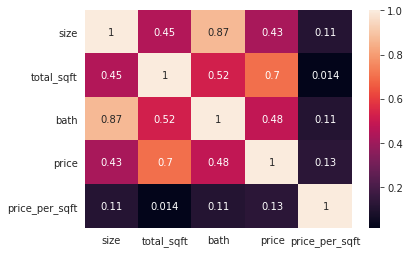

In [ ]:
sns.heatmap(df_2.corr(), annot = True)

In [ ]:
df_2.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056,2,39.070,3699.811
1,Chikka Tirupathi,4,2600,5,120.000,4615.385
2,Uttarahalli,3,1440,2,62.000,4305.556
3,Lingadheeranahalli,3,1521,3,95.000,6245.891
4,Kothanur,2,1200,2,51.000,4250.000
5,Whitefield,2,1170,2,38.000,3247.863
6,Marathahalli,3,1310,3,63.250,4828.244
7,Whitefield,3,1800,2,70.000,3888.889
8,Whitefield,4,2785,5,295.000,10592.460
9,7th Phase JP Nagar,2,1000,2,38.000,3800.000


In [ ]:
#rescaling data so that all data have same scale
from sklearn.preprocessing import MinMaxScaler
df_3 = df_2.copy()
df_3=df_3.drop('location', axis=1)
array = df_3.values
x=array
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(x)
np.set_printoptions(precision=3)
X=pd.DataFrame(rescaledX)
X.columns=df_3.columns
X.head()

,size,total_sqft,bath,price,price_per_sqft
0,0.125,0.040,0.125,0.011,0.001
1,0.375,0.099,0.500,0.039,0.002
2,0.250,0.055,0.125,0.019,0.002
3,0.250,0.058,0.250,0.030,0.002
4,0.125,0.046,0.125,0.015,0.002


In [ ]:
X.corr()

,size,total_sqft,bath,price,price_per_sqft
size,1.000,0.449,0.869,0.426,0.113
total_sqft,0.449,1.000,0.523,0.702,0.014
bath,0.869,0.523,1.000,0.483,0.108
price,0.426,0.702,0.483,1.000,0.127
price_per_sqft,0.113,0.014,0.108,0.127,1.000


In [ ]:

df_temp = X[['price_per_sqft', 'price']]
df_temp.corr()

,price_per_sqft,price
price_per_sqft,1.000,0.127
price,0.127,1.000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


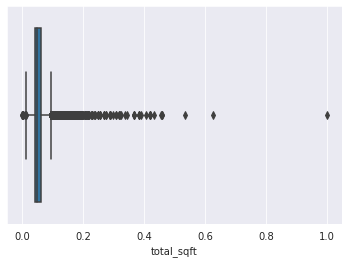

In [ ]:
sns.boxplot('total_sqft', data = X, orient = 'vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


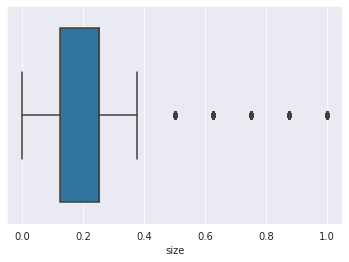

In [ ]:
sns.boxplot('size', data = X, orient = 'vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


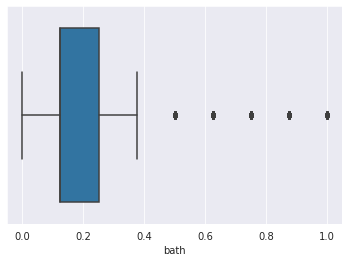

In [ ]:
sns.boxplot('bath', data = X, orient = 'vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


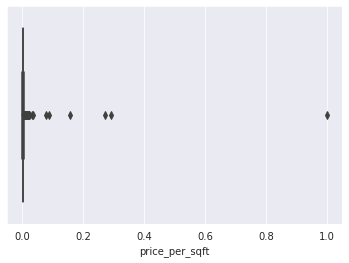

In [ ]:
sns.boxplot('price_per_sqft', data = X, orient = 'vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


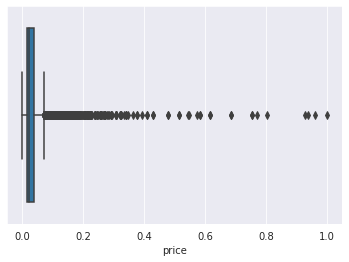

In [ ]:
sns.boxplot('price', data = X, orient = 'vertical')

In [ ]:
max_threshold = X[["bath","size","total_sqft", "price", "price_per_sqft"]].quantile(0.95)
max_threshold

bath             0.500
size             0.500
total_sqft       0.115
price            0.101
price_per_sqft   0.006
Name: 0.95, dtype: float64

In [ ]:
X = X.drop(X[X['bath'] > .500].index)
X = X.drop(X[X['size'] > .500].index)
X = X.drop(X[X['total_sqft'] > .115].index)
X = X.drop(X[X['price'] > 0.101].index)
X = X.drop(X[X['price_per_sqft'] > .006].index)

In [ ]:
X.corr()

,size,total_sqft,bath,price,price_per_sqft
size,1.000,0.646,0.811,0.553,0.315
total_sqft,0.646,1.000,0.684,0.762,0.221
bath,0.811,0.684,1.000,0.620,0.356
price,0.553,0.762,0.620,1.000,0.757
price_per_sqft,0.315,0.221,0.356,0.757,1.000


now we can see that it is quite correlated and hence helpful in doing prediction. total_sqft and price_per_sqft is quite well correlated to predict price, we may work little more on size and bath

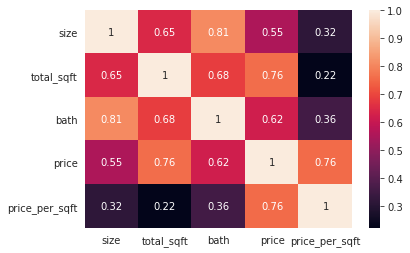

In [ ]:
sns.heatmap(X.corr(), annot = True)

Text(0, 0.5, 'Count')

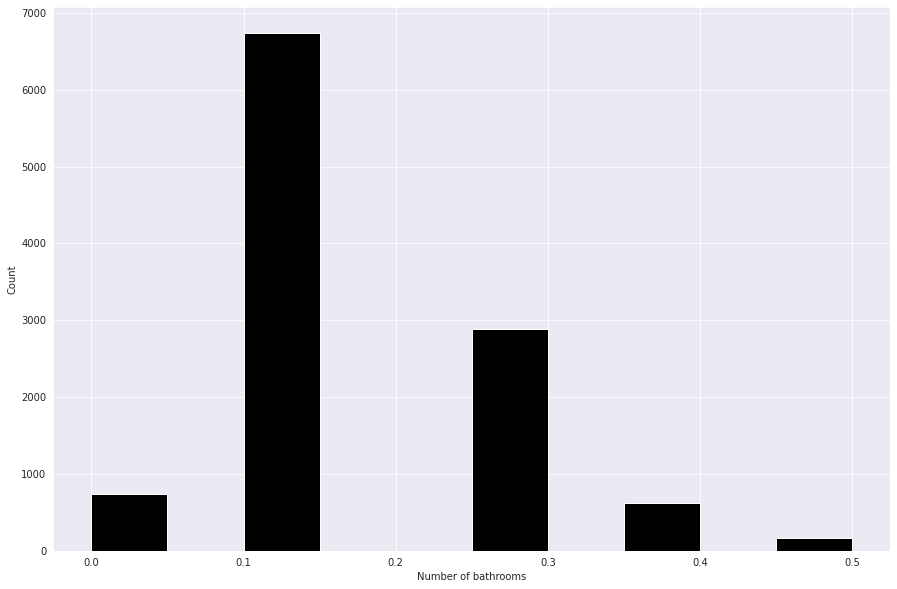

In [ ]:
plt.hist(X.bath, color = "black")
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

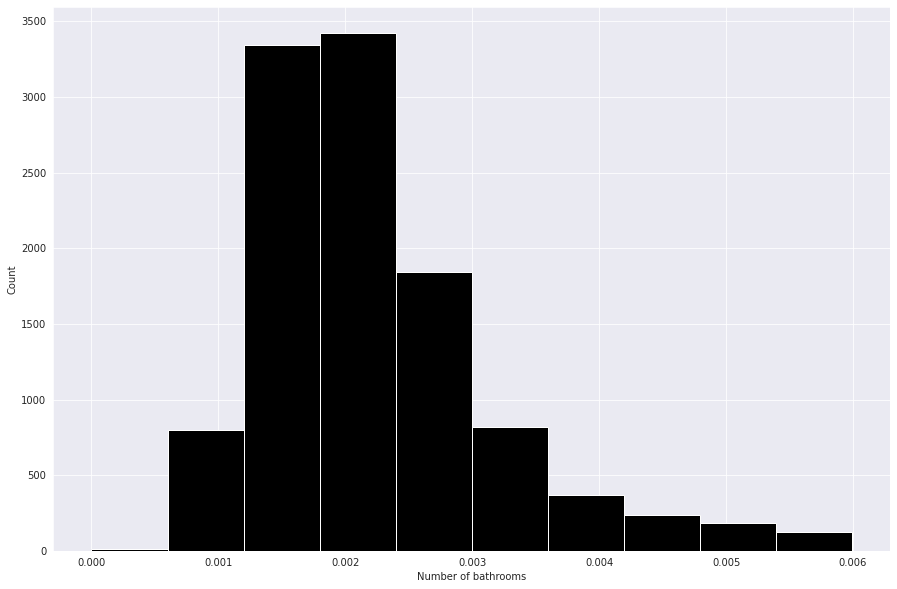

In [ ]:
plt.hist(X.price_per_sqft, color = "black")
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [ ]:
X.head()

,size,total_sqft,bath,price,price_per_sqft
0,0.125,0.040,0.125,0.011,0.001
1,0.375,0.099,0.500,0.039,0.002
2,0.250,0.055,0.125,0.019,0.002
3,0.250,0.058,0.250,0.030,0.002
4,0.125,0.046,0.125,0.015,0.002


In [ ]:
df_2.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056,2,39.070,3699.811
1,Chikka Tirupathi,4,2600,5,120.000,4615.385
2,Uttarahalli,3,1440,2,62.000,4305.556
3,Lingadheeranahalli,3,1521,3,95.000,6245.891
4,Kothanur,2,1200,2,51.000,4250.000
